# ECSE 415 - Assignment 5:  Segmentation
## Theo Ghanem 260972584

Note that parts of this assignment have been taken/inspired from the following sources:
- Tutorials
- PyTorch documentation
- StackOverflow
- Generative AI
- Class lectures

## Part 1 - K-Means and Mean-Shift Clustering for Segmentation

### 1.Compute  the  features  of  the Dog.jpg  and Person.jpg images  by  convolving  the  images with the two Haar filter kernels shown below. 
The white areas of the Haar filter kernel all have a  weight  of  +1,  while  the  black  areas  have  a  weight  of -1.  For  the  purposes  of  obtaining the convolution  values  for  pixels  near  the  border  of  the  image,  assume  that  the  intensity values of pixels outside the borders of the image are 0. You could use the integral image technique to implement the Haar filtering in a more computationally efficient (i.e. faster)manner.Display the filtered feature images

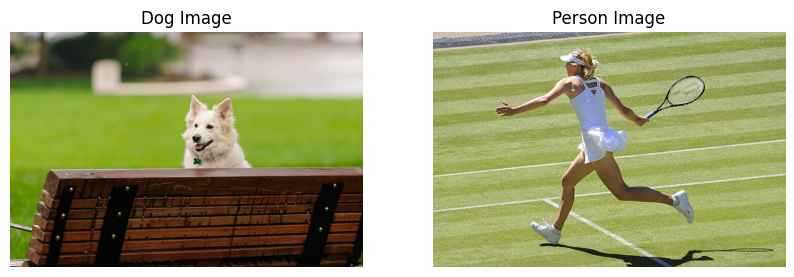

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# from google.colab import drive
# drive.mount('/content/drive')

# Load image Google Drive
# image_path = '/content/drive/My Drive/ECSE415_computer_vision/A5/'
image_path = r"C:\Users\theog\Documents\CodingProjects\ECSE415_Computer_Vision\Assignments\A5"
dog_image = cv2.imread(image_path + "\Part 1\Dog.jpg")
person_image = cv2.imread(image_path + "\Part 1\Person.jpg")

# show both images next to each other:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(dog_image, cv2.COLOR_BGR2RGB))
plt.title("Dog Image")
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(person_image, cv2.COLOR_BGR2RGB))
plt.title("Person Image")
plt.axis('off')
plt.show()

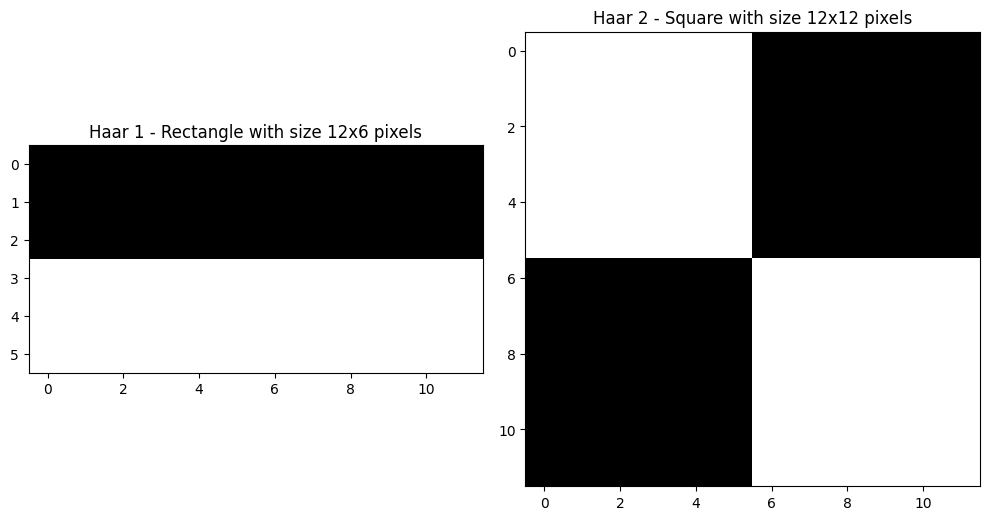

In [24]:
# Define Haar1 filter (rectangle 12x6)
haar1_top = -1 * np.ones((3, 12))  # White top rectangle
haar1_bottom = np.ones((3, 12))  # Black bottom rectangle
haar1 = np.vstack((haar1_top, haar1_bottom)) # Combined 

# Define Haar2 filter (square 12x12)
haar2_top_left = np.ones((6, 6))
haar2_top_right = -1 * np.ones((6, 6))
haar2_bottom_left = -1 * np.ones((6, 6))
haar2_bottom_right = np.ones((6, 6))

# combine the 4 quadrants
haar2_top = np.hstack((haar2_top_left, haar2_top_right))
haar2_bottom = np.hstack((haar2_bottom_left, haar2_bottom_right))
haar2 = np.vstack((haar2_top, haar2_bottom))

# Plot filters
plt.figure(figsize=(10, 5))  # Adjust figure size for two subplots

# Subplot 1: Haar1
plt.subplot(1, 2, 1)
plt.imshow(haar1, cmap='gray')
plt.title('Haar 1 - Rectangle with size 12x6 pixels')

# Subplot 2: Haar2
plt.subplot(1, 2, 2)
plt.imshow(haar2, cmap='gray')
plt.title('Haar 2 - Square with size 12x12 pixels')

plt.tight_layout()  # Adjust spacing between subplots for better visualization
plt.show()


In [25]:
#Compute  the  features  of  the Dog.jpg  and Person.jpgimages  by  convolving  the  imageswith the two Haar filter kernels shown below. The white areas of the Haar filter kernel allhave a  weight  of  +1,  while  the  black  areas  have  a  weight  of -1.  For  the  purposes  of  obtainingthe convolution  values  for  pixels  near  the  border  of  the  image,  assume  that  the  intensityvalues of pixels outside the borders of the image are 0. You could use the integral imagetechnique to implement the Haar filtering in a more computationally efficient (i.e. faster)manner.Displaythefilteredfeatureimages

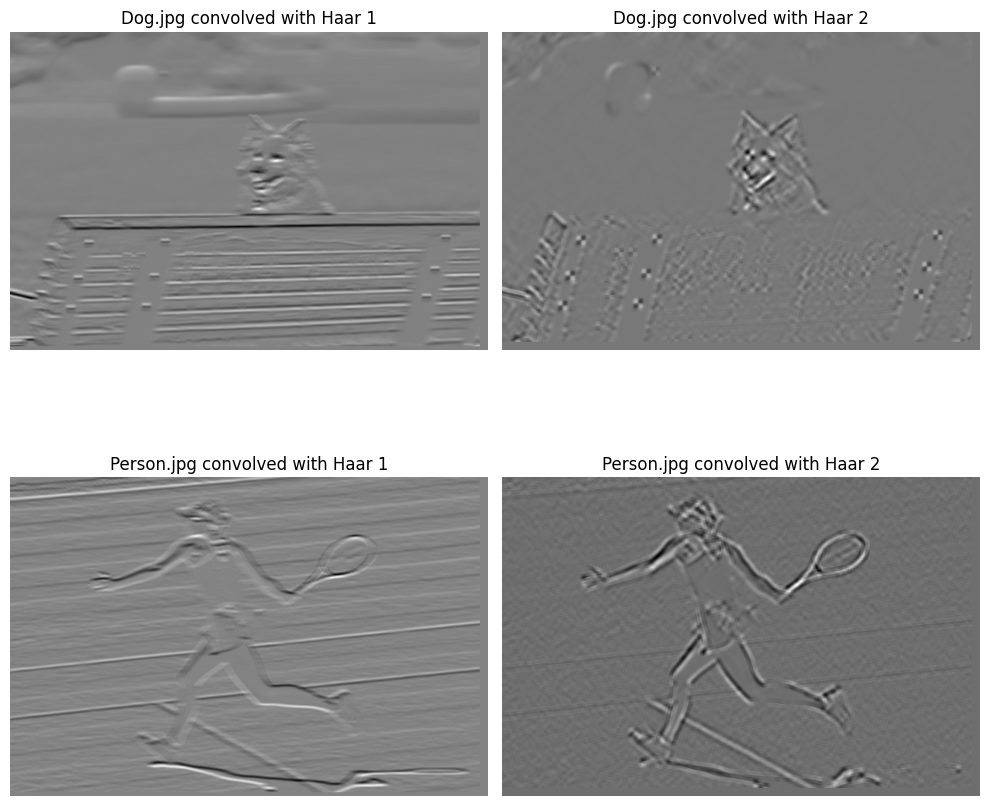

In [26]:
def convolve_haar(image, haar_filter):
    # Convert image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Initialize output image
    output_image = np.zeros_like(gray_image, dtype=np.float32)
    # Get image dimensions
    image_height, image_width = gray_image.shape
    # Get filter dimensions
    filter_height, filter_width = haar_filter.shape
    # Loop through image
    for i in range(image_height - filter_height + 1):
        for j in range(image_width - filter_width + 1):
            # Get region of interest
            roi = gray_image[i:i + filter_height, j:j + filter_width]
            # Compute convolution
            output_image[i, j] = np.sum(roi * haar_filter)
    return output_image

# Convolve Dog.jpg with Haar1 and Haar2 filters
dog_haar1 = convolve_haar(dog_image, haar1)
dog_haar2 = convolve_haar(dog_image, haar2)

# Convolve Person.jpg with Haar1 and Haar2 filters
person_haar1 = convolve_haar(person_image, haar1)
person_haar2 = convolve_haar(person_image, haar2)

# Display filtered feature images
plt.figure(figsize=(10, 10))  # Adjust figure size for four subplots

# Subplot 1: Dog.jpg convolved with Haar1
plt.subplot(2, 2, 1)
plt.imshow(dog_haar1, cmap='gray')
plt.title('Dog.jpg convolved with Haar 1')
plt.axis('off')

# Subplot 2: Dog.jpg convolved with Haar2
plt.subplot(2, 2, 2)
plt.imshow(dog_haar2, cmap='gray')
plt.title('Dog.jpg convolved with Haar 2')
plt.axis('off')

# Subplot 3: Person.jpg convolved with Haar1
plt.subplot(2, 2, 3)
plt.imshow(person_haar1, cmap='gray')
plt.title('Person.jpg convolved with Haar 1')
plt.axis('off')

# Subplot 4: Person.jpg convolved with Haar2
plt.subplot(2, 2, 4)
plt.imshow(person_haar2, cmap='gray')
plt.title('Person.jpg convolved with Haar 2')
plt.axis('off')

plt.tight_layout()  # Adjust spacing between subplots for better visualization
plt.show()

### 2. Implement the K-means clustering to compute the segmentation of the Dog.jpg and the Person.jpg image with Haar features. 
Set K=3. Display the segmented images.

In [27]:
# overlay haar1 and haar2 on original image

### 3. Implement the Mean-shift clustering to compute the segmentation of the Dog.jpg and Person.jpg images. 
Display the segmented images.

#### 4. Discuss the benefits and limitations of these clustering methods for image segmentation.

